In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
import matplotlib.pyplot as plt

from bbl import *

In [35]:
# Constant parameters
g = 9.81
α = 2e-4
Γ = 0.0008613659531090722
N = np.sqrt(g*α*Γ)
θ = 1.26E-3
f = -5.3e-5

h = 230.
k0 = 5.2e-5
k1 = 1.8e-3
σ = 1.

bbl = bbl_exp(k0, k1, h, N, f, θ, σ=σ)
bbl_transient = bbl_exp_spinup(
    T = 10000*365*86400., dt=100*365*86400.,
    k0=k0, k1=k1, h=h, N=N, f=f, θ=θ, σ=σ
)

2020-07-22 11:16:01,270 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.7e+01/s
2020-07-22 11:16:04,587 solvers 0/1 INFO :: Simulation stop time reached.


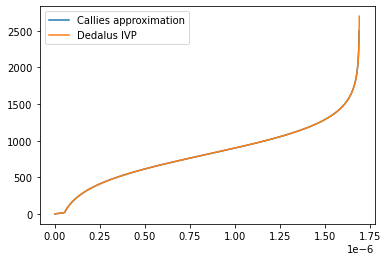

In [36]:
plt.plot(bbl['bz'], bbl['zf'], label='Callies approximation')
plt.plot(bbl_transient['bz'], bbl_transient['zf'], label='Dedalus IVP')
plt.legend()